In [1]:
import os

In [2]:
dataset_path = 'C:/pythonn/chest_xray/chest_xray/'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
BATCH_SIZE = 32
batch_size = BATCH_SIZE
input_size = [256*2, 256*2, 3]
image_size = (256*2, 256*2)

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255   
)
dataset_normal= datagen.flow_from_directory(
    os.path.join(dataset_path),  
    classes=['PNEUMONIA'],
    target_size=image_size,        
    batch_size=BATCH_SIZE,      
    class_mode='binary',        
    shuffle=True                 
)

Found 3875 images belonging to 1 classes.


In [31]:
import cv2
import numpy as np
import csv

# Function to extract features from an image
def extract_features(image):
    _, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    perimeter = cv2.arcLength(largest_contour, True)
    area = cv2.contourArea(largest_contour)
    equivalent_diameter = np.sqrt(4 * area / np.pi)
    irregularity_index = perimeter / (2 * np.sqrt(np.pi * area))

    std_deviation = np.std(image)
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    entropy = -np.sum(hist * np.log2(hist + 1e-10))

    return {
        'Perimeter': perimeter,
        'Area': area,
        'Equivalent Diameter': equivalent_diameter,
        'Irregularity Index': irregularity_index,
        'Standard Deviation': std_deviation,
        'Entropy': entropy
    }

# Directory containing images
images_dir = 'C:/pythonn/chest_xray/chest_xray/PNEUMONIA/'

# Initialize data dictionary
data = {
    's.no.': [],
    'Perimeter': [],
    'Area': [],
    'Equivalent Diameter': [],
    'Irregularity Index': [],
    'Standard Deviation': [],
    'Entropy': []
}

# Iterate through images and extract features
image_count = 0
for filename in os.listdir(images_dir):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        image_path = os.path.join(images_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        features = extract_features(image)

        image_count += 1
        data['s.no.'].append(image_count)
        for key, value in features.items():
            data[key].append(value)

# Save the features to a CSV file
csv_file_path = 'features_all_images.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['s.no.', 'Perimeter', 'Area', 'Equivalent Diameter', 'Irregularity Index', 'Standard Deviation', 'Entropy']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(data['s.no.'])):
        writer.writerow({
            's.no.': data['s.no.'][i],
            'Perimeter': data['Perimeter'][i],
            'Area': data['Area'][i],
            'Equivalent Diameter': data['Equivalent Diameter'][i],
            'Irregularity Index': data['Irregularity Index'][i],
            'Standard Deviation': data['Standard Deviation'][i],
            'Entropy': data['Entropy'][i]
        })

print("Features saved to", csv_file_path)

Features saved to features_all_images.csv


The units for each feature can be as follows:

- **Perimeter**: mm (millimeters)
- **Area**: mm² (square millimeters)
- **Equivalent Diameter**: mm (millimeters)
- **Irregularity Index**: Unitless (as it's a ratio)
- **Standard Deviation**: Unitless (as it's a measure of variability)
- **Entropy**: Unitless (as it's a measure of information)

These units are commonly used when describing measurements and statistical values in the context of image analysis and medical imaging.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('features_all_images.csv')

In [8]:
df.head()

,s.no.,Perimeter,Area,Equivalent Diameter,Irregularity Index,Standard Deviation,Entropy
0,1,8854.459806,472691.0,775.789194,3.633026,56.234071,7.462115
1,2,8052.698271,531891.5,822.936991,3.114763,57.410076,7.322115
2,3,15399.594589,453581.5,759.945987,6.450252,56.048093,7.395821
3,4,10243.078326,231545.5,542.966746,6.004922,44.211844,7.191531
4,5,15915.372158,773875.0,992.637020,5.103598,59.098705,7.404311


In [9]:
df.tail()

,s.no.,Perimeter,Area,Equivalent Diameter,Irregularity Index,Standard Deviation,Entropy
3870,3871,10646.474084,724440.0,960.409109,3.528577,61.979300,7.354649
3871,3872,5949.628958,613454.0,883.783849,2.142861,53.865933,7.343686
3872,3873,6458.464527,675283.5,927.252747,2.217080,49.761992,7.398004
3873,3874,5968.803497,691740.5,938.483542,2.024467,51.411900,7.245558
3874,3875,6169.768129,536652.5,826.611871,2.375841,48.046780,7.425069


In [10]:
df.shape

(3875, 7)

In [11]:
df.columns

Index(['s.no.', 'Perimeter', 'Area', 'Equivalent Diameter',
       'Irregularity Index', 'Standard Deviation', 'Entropy'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

s.no.                  0
Perimeter              0
Area                   0
Equivalent Diameter    0
Irregularity Index     0
Standard Deviation     0
Entropy                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   s.no.                3875 non-null   int64  
 1   Perimeter            3875 non-null   float64
 2   Area                 3875 non-null   float64
 3   Equivalent Diameter  3875 non-null   float64
 4   Irregularity Index   3875 non-null   float64
 5   Standard Deviation   3875 non-null   float64
 6   Entropy              3875 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 212.0 KB


In [15]:
df.describe()

,s.no.,Perimeter,Area,Equivalent Diameter,Irregularity Index,Standard Deviation,Entropy
count,3875.000000,3875.000000,3.875000e+03,3875.000000,3875.000000,3875.000000,3875.000000
mean,1938.000000,8215.450795,6.467405e+05,849.425381,3.244337,55.341740,7.246469
std,1118.760475,4136.707817,4.953325e+05,319.309374,1.465197,10.095414,0.231496
min,1.000000,334.149275,3.727500e+03,68.891222,1.232962,20.415354,6.004755
25%,969.500000,5425.128793,3.133222e+05,631.612441,2.057481,48.620791,7.132298
50%,1938.000000,7283.914439,5.127685e+05,808.008126,2.934865,54.679415,7.300971
75%,2906.500000,10088.473209,8.451435e+05,1037.337999,4.079508,62.276554,7.405335
max,3875.000000,37569.150822,4.156038e+06,2300.354740,19.748339,87.480423,7.760482


In [16]:
df = df.drop(['s.no.'], axis = 1)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import warnings
warnings.filterwarnings('ignore')

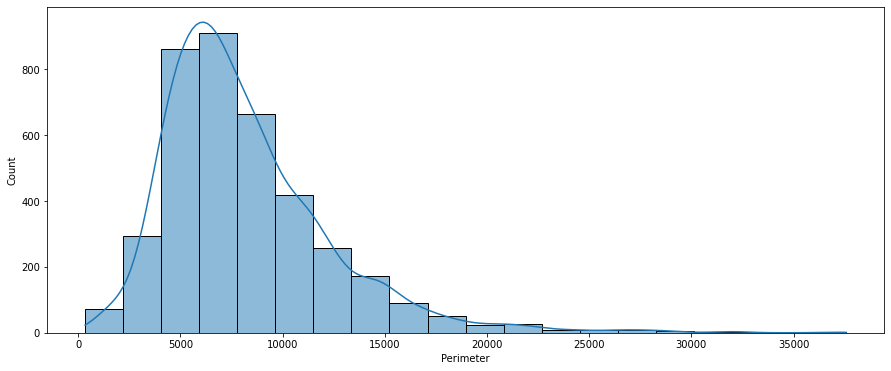

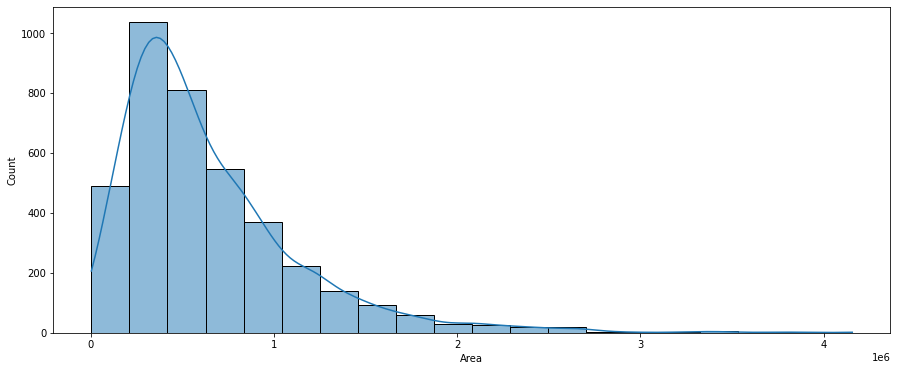

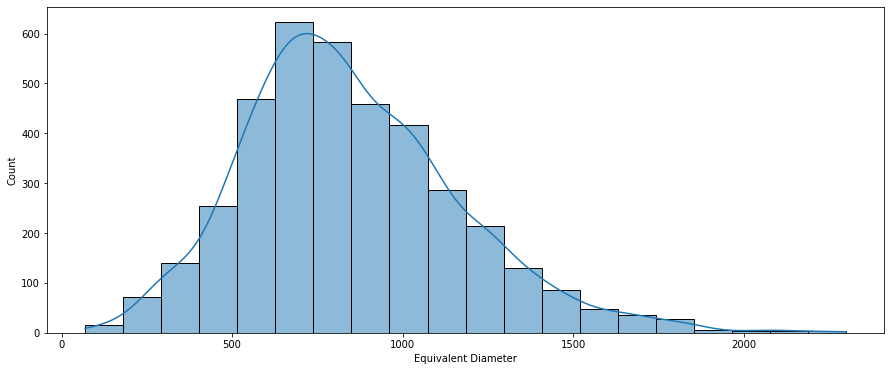

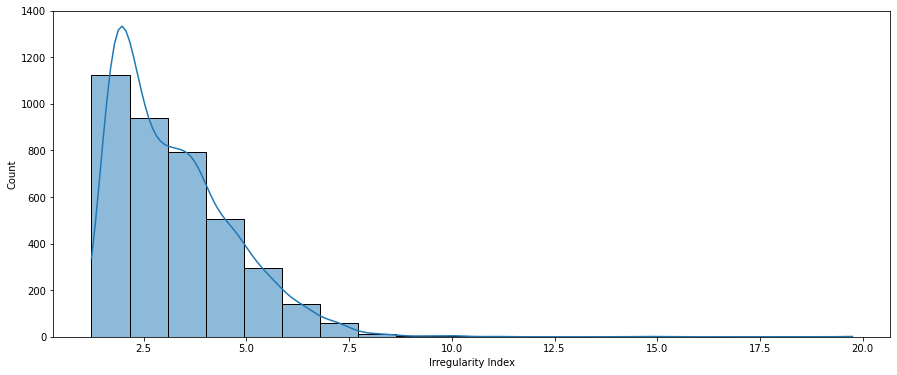

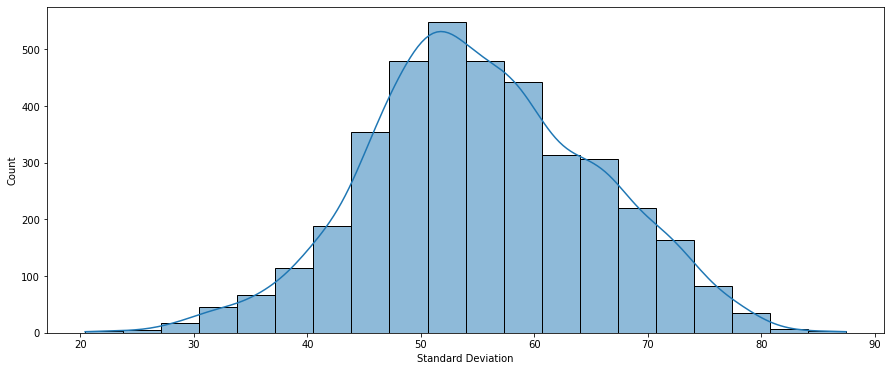

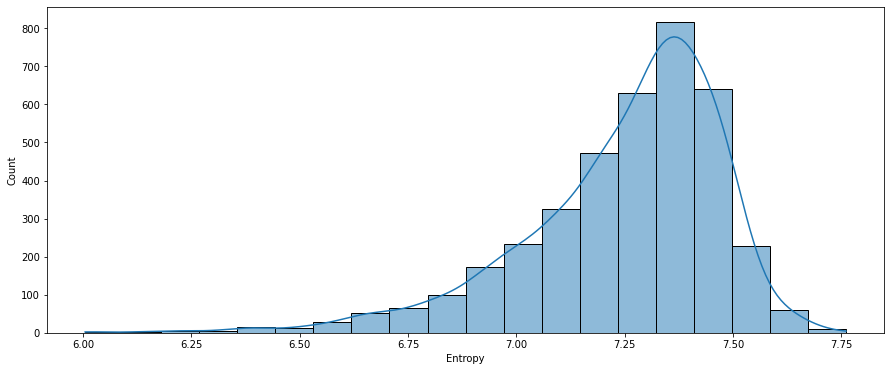

In [19]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

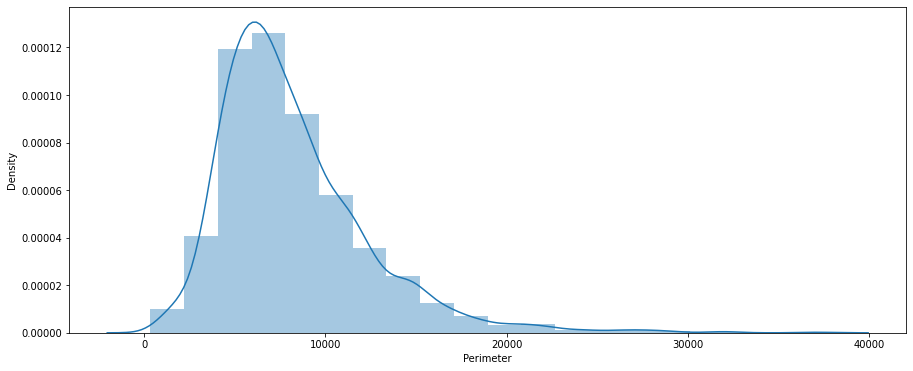

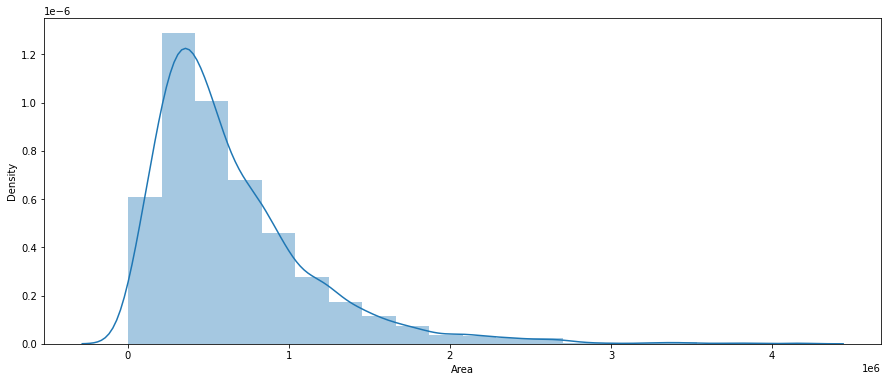

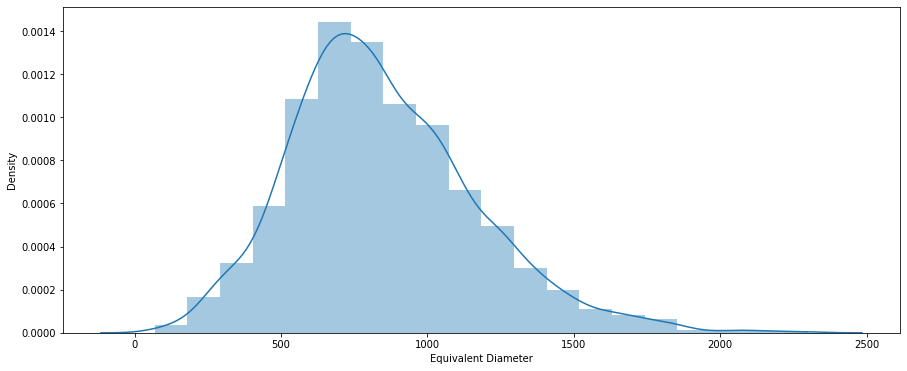

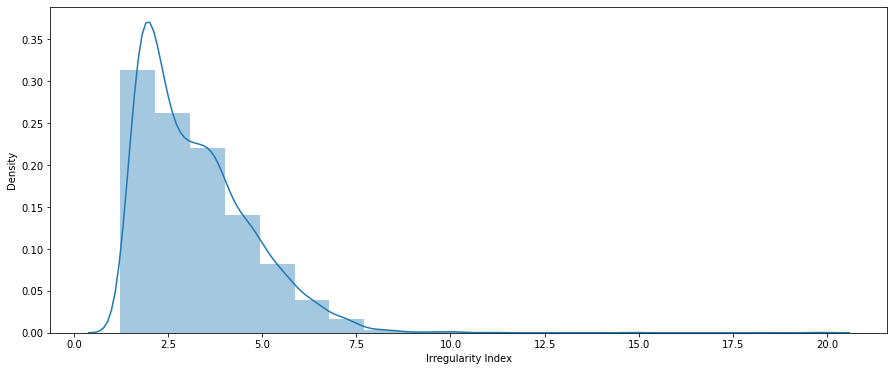

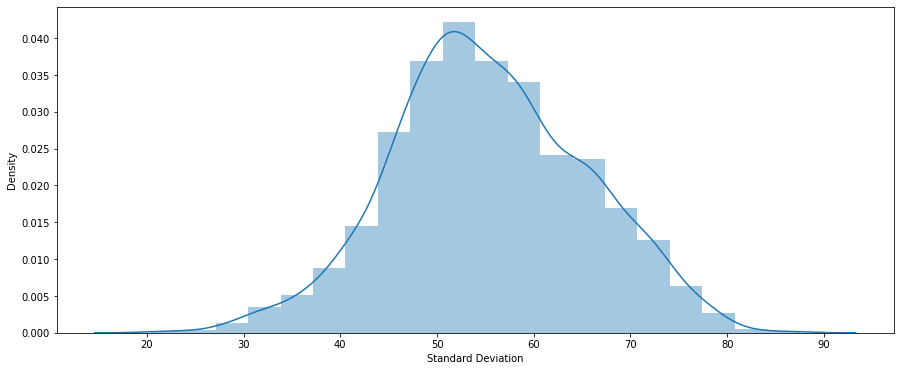

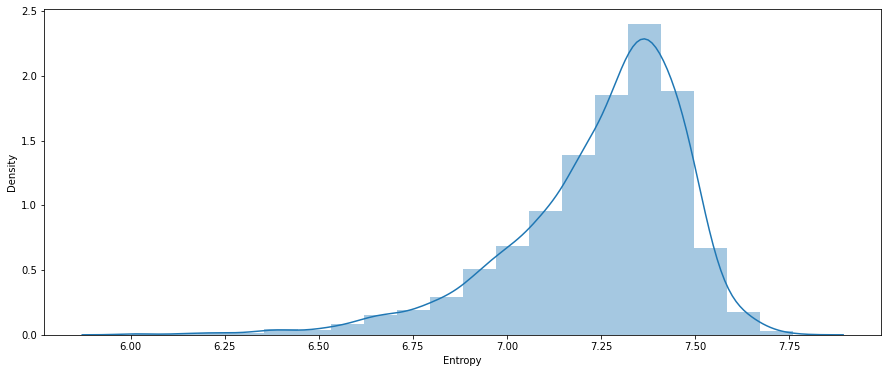

In [20]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

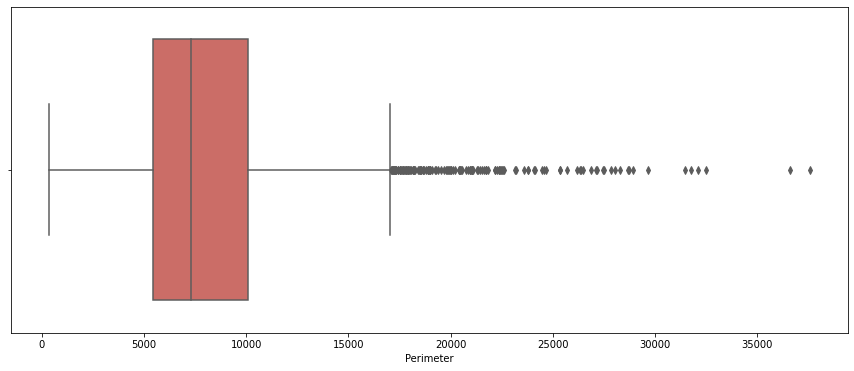

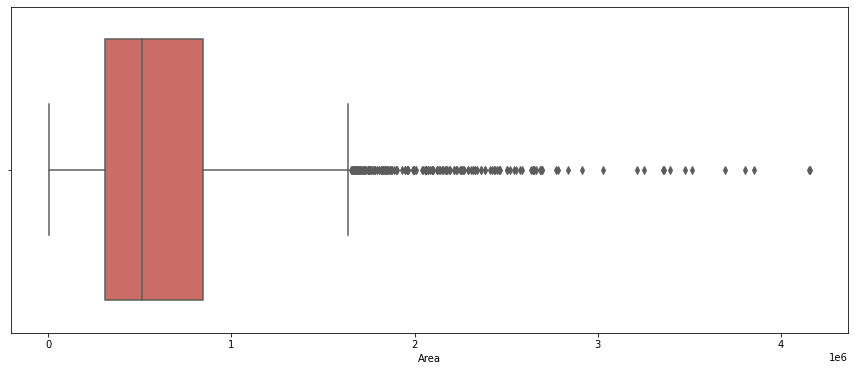

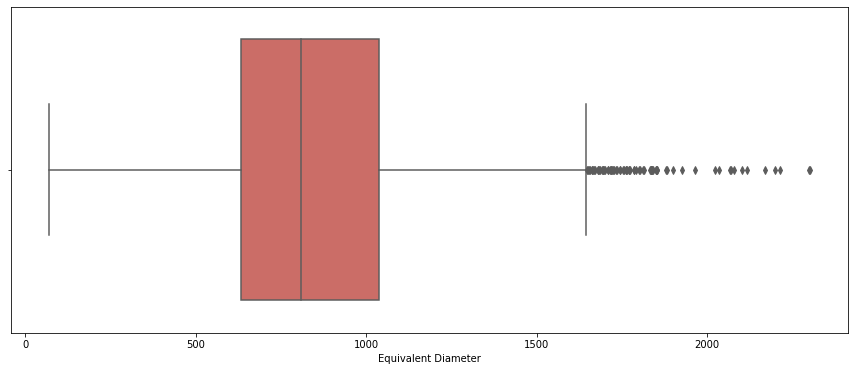

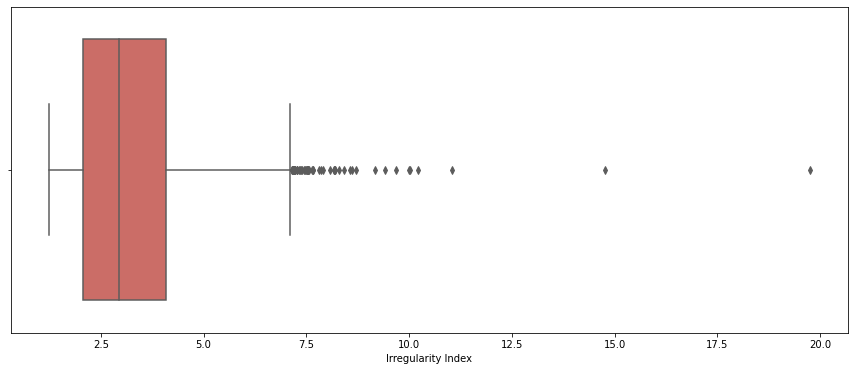

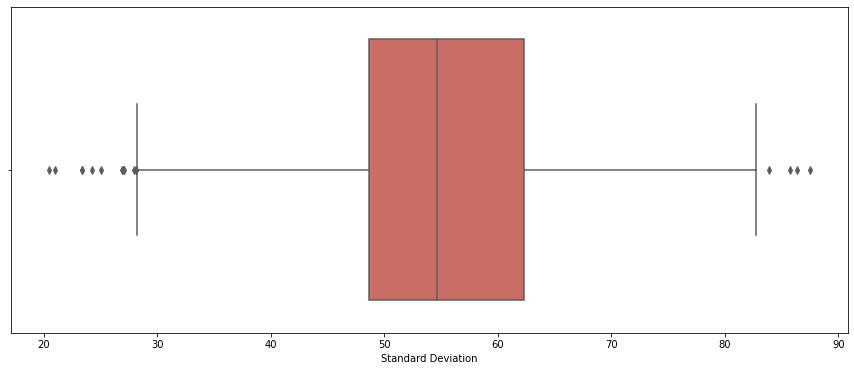

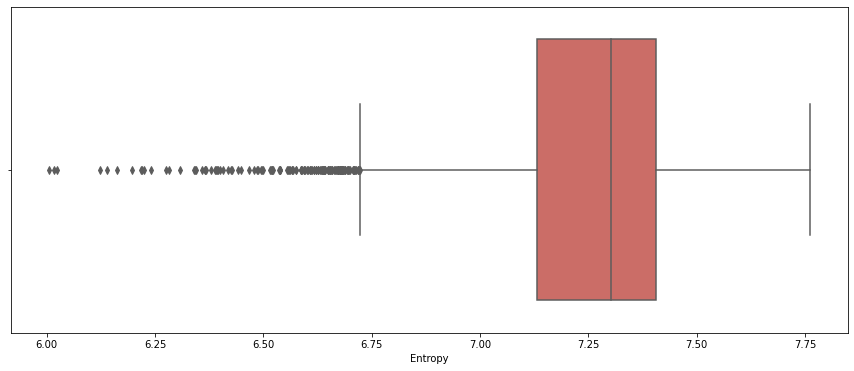

In [21]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i], data=df, palette='hls')
    plt.xticks(rotation = 0)
    plt.show()

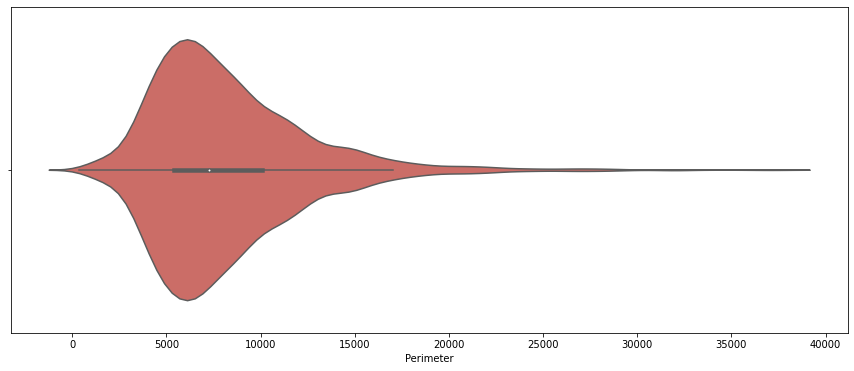

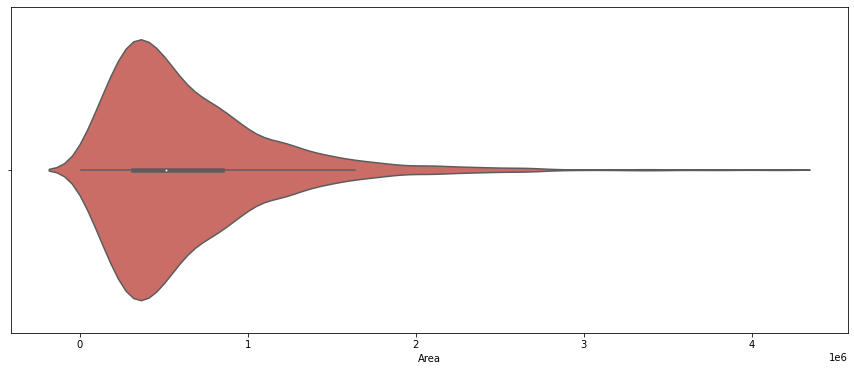

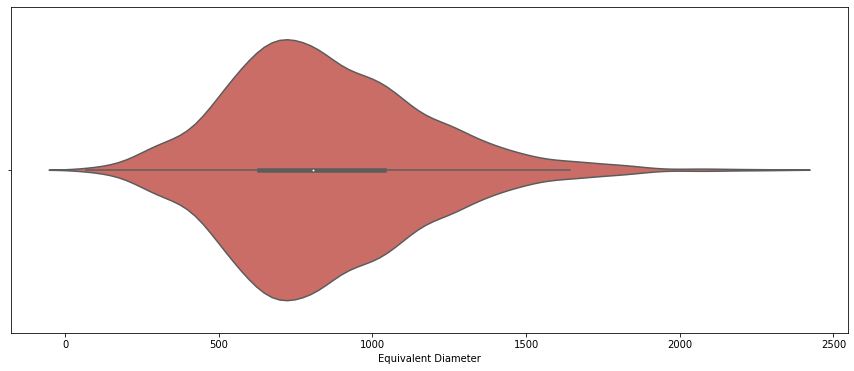

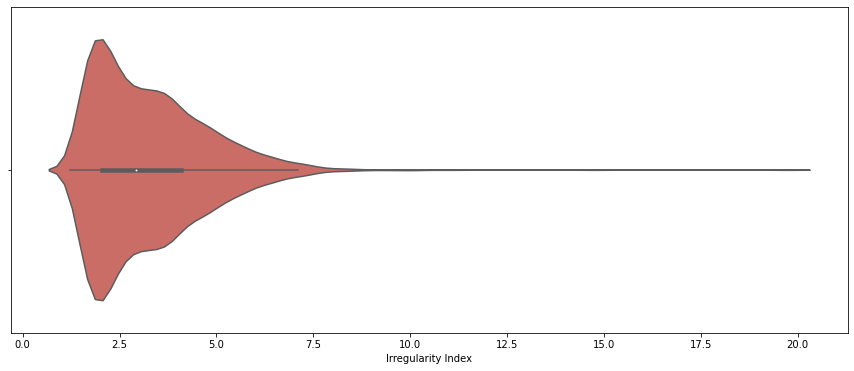

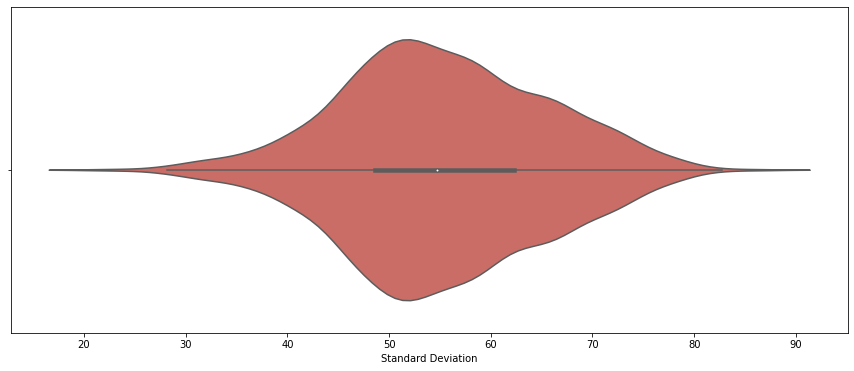

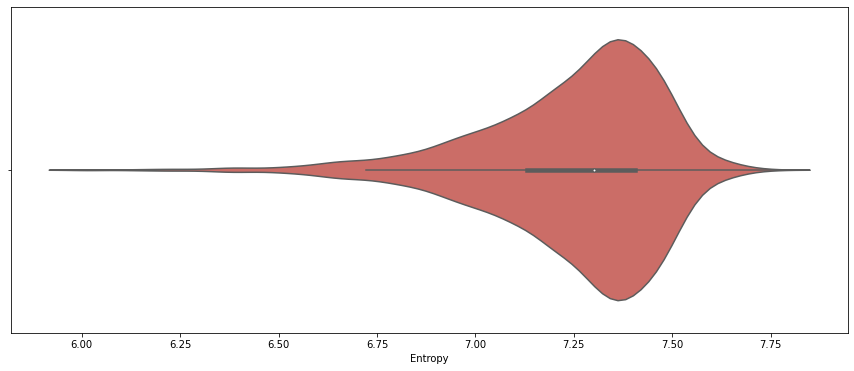

In [22]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(df[i], data=df, palette='hls')
    plt.xticks(rotation = 0)
    plt.show()

In [23]:
df['Text Description'] = (
    "The image shows signs of pneumonia with:\n"
    "- Perimeter: " + df['Perimeter'].astype(str) + " mm\n"
    "- Area: " + df['Area'].astype(str) + " sqmm\n"
    "- Equivalent Diameter: " + df['Equivalent Diameter'].astype(str) + " mm\n"
    "- Irregularity Index: " + df['Irregularity Index'].astype(str) + "\n"
    "- Standard Deviation: " + df['Standard Deviation'].astype(str) + "\n"
    "- Entropy: " + df['Entropy'].astype(str)
)

In [24]:
df

,Perimeter,Area,Equivalent Diameter,Irregularity Index,Standard Deviation,Entropy,Text Description
0,8854.459806,472691.0,775.789194,3.633026,56.234071,7.462115,The image shows signs of pneumonia with:\n- Pe...
1,8052.698271,531891.5,822.936991,3.114763,57.410076,7.322115,The image shows signs of pneumonia with:\n- Pe...
2,15399.594589,453581.5,759.945987,6.450252,56.048093,7.395821,The image shows signs of pneumonia with:\n- Pe...
3,10243.078326,231545.5,542.966746,6.004922,44.211844,7.191531,The image shows signs of pneumonia with:\n- Pe...
4,15915.372158,773875.0,992.637020,5.103598,59.098705,7.404311,The image shows signs of pneumonia with:\n- Pe...
...,...,...,...,...,...,...,...
3870,10646.474084,724440.0,960.409109,3.528577,61.979300,7.354649,The image shows signs of pneumonia with:\n- Pe...
3871,5949.628958,613454.0,883.783849,2.142861,53.865933,7.343686,The image shows signs of pneumonia with:\n- Pe...
3872,6458.464527,675283.5,927.252747,2.217080,49.761992,7.398004,The image shows signs of pneumonia with:\n- Pe...
3873,5968.803497,691740.5,938.483542,2.024467,51.411900,7.245558,The image shows signs of pneumonia with:\n- Pe...


In [25]:
mean_values = df.mean()
std_values = df.std()

In [26]:
threshold_values = {
    'Perimeter': mean_values['Perimeter'] + std_values['Perimeter'],
    'Area': mean_values['Area'] + std_values['Area'],
    'Equivalent Diameter': mean_values['Equivalent Diameter'] + std_values['Equivalent Diameter'],
    'Irregularity Index': mean_values['Irregularity Index'] + std_values['Irregularity Index'],
    'Standard Deviation': mean_values['Standard Deviation'] + std_values['Standard Deviation'],
    'Entropy': mean_values['Entropy'] + std_values['Entropy']
}

In [27]:
print("Threshold Values:")
print(threshold_values)

Threshold Values:
{'Perimeter': 12352.158611264425, 'Area': 1142073.0530007, 'Equivalent Diameter': 1168.7347548064004, 'Irregularity Index': 4.709534405872971, 'Standard Deviation': 65.43715396067326, 'Entropy': 7.477964426860271}


In [28]:
def get_prescription(row):
    prescription = ""
    
    if (
        row['Perimeter'] < threshold_values['Perimeter'] and
        row['Area'] < threshold_values['Area'] and
        row['Equivalent Diameter'] < threshold_values['Equivalent Diameter'] and
        row['Irregularity Index'] < threshold_values['Irregularity Index'] and
        row['Standard Deviation'] < threshold_values['Standard Deviation'] and
        row['Entropy'] < threshold_values['Entropy']
    ):
        prescription += "Mild case of pneumonia. Recommend 5 days of oral antibiotics such as amoxicillin. "
        prescription += "Monitor symptoms and follow up with doctor if no improvement in 7 days. Home rest and hydration advised."

    elif (
        row['Perimeter'] > threshold_values['Perimeter'] or
        row['Area'] > threshold_values['Area'] or
        row['Equivalent Diameter'] > threshold_values['Equivalent Diameter'] or
        row['Irregularity Index'] > threshold_values['Irregularity Index'] or
        row['Standard Deviation'] > threshold_values['Standard Deviation'] or
        row['Entropy'] > threshold_values['Entropy']
    ):
        prescription += "Moderate-severe case of pneumonia. Recommend 7-10 days of intravenous antibiotics in hospital along with oxygen support if needed. "
        prescription += "Strict monitoring of symptoms and follow up chest x-ray advised before discharge. "
        prescription += "Continue medications as prescribed after discharge and follow up with doctor."

    else:
        prescription += "Severe pneumonia case. Inpatient hospital admission required along with IV antibiotics, supplemental oxygen, "
        prescription += "and possible respiratory support depending on symptoms and exam findings. "
        prescription += "Close monitoring in critical care unit advised. "
        prescription += "Additional testing may be needed based on clinical assessment."

    # Add medicine recommendations
    prescription += "\n\nMedicine Recommendations:"
    if "oral antibiotics" in prescription.lower():
        prescription += "\n- Amoxicillin 500mg, take 1 tablet three times a day after meals."
    elif "intravenous antibiotics" in prescription.lower():
        prescription += "\n- Ceftriaxone 1g, administered intravenously once a day."
    
    return prescription

In [29]:
df['Prescription'] = df.apply(get_prescription, axis=1)

In [30]:
df

,Perimeter,Area,Equivalent Diameter,Irregularity Index,Standard Deviation,Entropy,Text Description,Prescription
0,8854.459806,472691.0,775.789194,3.633026,56.234071,7.462115,The image shows signs of pneumonia with:\n- Pe...,Mild case of pneumonia. Recommend 5 days of or...
1,8052.698271,531891.5,822.936991,3.114763,57.410076,7.322115,The image shows signs of pneumonia with:\n- Pe...,Mild case of pneumonia. Recommend 5 days of or...
2,15399.594589,453581.5,759.945987,6.450252,56.048093,7.395821,The image shows signs of pneumonia with:\n- Pe...,Moderate-severe case of pneumonia. Recommend 7...
3,10243.078326,231545.5,542.966746,6.004922,44.211844,7.191531,The image shows signs of pneumonia with:\n- Pe...,Moderate-severe case of pneumonia. Recommend 7...
4,15915.372158,773875.0,992.637020,5.103598,59.098705,7.404311,The image shows signs of pneumonia with:\n- Pe...,Moderate-severe case of pneumonia. Recommend 7...
...,...,...,...,...,...,...,...,...
3870,10646.474084,724440.0,960.409109,3.528577,61.979300,7.354649,The image shows signs of pneumonia with:\n- Pe...,Mild case of pneumonia. Recommend 5 days of or...
3871,5949.628958,613454.0,883.783849,2.142861,53.865933,7.343686,The image shows signs of pneumonia with:\n- Pe...,Mild case of pneumonia. Recommend 5 days of or...
3872,6458.464527,675283.5,927.252747,2.217080,49.761992,7.398004,The image shows signs of pneumonia with:\n- Pe...,Mild case of pneumonia. Recommend 5 days of or...
3873,5968.803497,691740.5,938.483542,2.024467,51.411900,7.245558,The image shows signs of pneumonia with:\n- Pe...,Mild case of pneumonia. Recommend 5 days of or...


In [31]:
df['Prescription'].nunique()

2

In [32]:
df['Prescription'].value_counts()

Mild case of pneumonia. Recommend 5 days of oral antibiotics such as amoxicillin. Monitor symptoms and follow up with doctor if no improvement in 7 days. Home rest and hydration advised.\n\nMedicine Recommendations:\n- Amoxicillin 500mg, take 1 tablet three times a day after meals.                                                                                                   1987
Moderate-severe case of pneumonia. Recommend 7-10 days of intravenous antibiotics in hospital along with oxygen support if needed. Strict monitoring of symptoms and follow up chest x-ray advised before discharge. Continue medications as prescribed after discharge and follow up with doctor.\n\nMedicine Recommendations:\n- Ceftriaxone 1g, administered intravenously once a day.    1888
Name: Prescription, dtype: int64

In [38]:
df.to_csv('xray.csv', index = False)

In [34]:
def save_dataframe_to_text(df, filename):
    with open(filename, 'w') as file:
        for index, row in df.iterrows():
            row_str = f"Perimeter: {row['Perimeter']}, Area: {row['Area']}, Equivalent Diameter: {row['Equivalent Diameter']}, Irregularity Index: {row['Irregularity Index']}, Standard Deviation: {row['Standard Deviation']}, Entropy: {row['Entropy']}, Text Description: {row['Text Description']}, Prescription: {row['Prescription']}\n"

           
            file.write(row_str)

save_dataframe_to_text(df, 'features_data.txt')